In [1]:
# !python -m pip install gwpy
# !pip install astropy==4.2.1

In this competition you are provided with a training set of time series data containing simulated gravitational wave measurements from a network of 3 gravitational wave interferometers (LIGO Hanford, LIGO Livingston, and Virgo). Each time series contains either detector noise or detector noise plus a simulated gravitational wave signal. The task is to identify when a signal is present in the data (target=1).

So we need to use the training data along with the target value to build our model and make predictions on the test IDs in form of probability that the target exists for that ID.

So basically data-science helping here by building models to filter out this noises from data-streams (which includes both noise frequencies and Gravitational Waves frequencies) so we can single out frequencies for Gravitational-Waves. This is very well-explained by by Professor Rana Adhikari of Caltech and a member of the LIGO team, who were the first to measure gravitational waves. See his [interview here]((https://youtu.be/1D2j8nTjOZ4?t=1946) )

In [2]:
import seaborn as sns
from scipy import signal
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from matplotlib import pyplot as plt

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Some basic definition

### What is this .NPY file?

It is a standard binary file format for persisting a single arbitrary NumPy array on disk. The format stores all of the shape and data type information necessary to reconstruct the array correctly even on another machine with a different architecture. The format is designed to be as simple as possible while achieving its limited goals. The implementation is intended to be pure Python and distributed as part of the main numpy package.

**This file format makes incredibly fast reading speed enhancement over reading from plain text or CSV files.**

### Sampling frequency in a TimeSeries

The sampling frequency, or sample rate, is the number of equal-spaced samples per unit of time. For instance, if you have 96 equally spaced observation per day, then you sampling rate is 96/day, or 96/24/3600=0.0011 Hz. Hz, which means per second, is widely used for sample rate.

In [9]:
# Checking the contents of one file
file = '../input/g2net-gravitational-wave-detection/train/0/0/0/000a5b6e5c.npy'
data = np.load(file)
print(data.shape)
print(data)
# print(data[0, :].shape)
# print(data[1, :].shape)
# print(data[2, :].shape)
print("data[0, :] is ", data[0, :])
# data_1

(3, 4096)
[[-3.82980864e-21 -3.88290722e-21 -3.89583068e-21 ...
   1.00965251e-20  9.68836567e-21  9.75052802e-21]
 [-5.39587907e-21 -5.86718917e-21 -5.59127863e-21 ...
  -3.90359733e-21 -4.08026656e-21 -3.59755890e-21]
 [-2.08338130e-21 -2.78123460e-21 -2.56792922e-21 ...
   1.62472677e-21  1.92169973e-21  1.69866822e-21]]
data[0, :] is  [-3.82980864e-21 -3.88290722e-21 -3.89583068e-21 ...
  1.00965251e-20  9.68836567e-21  9.75052802e-21]


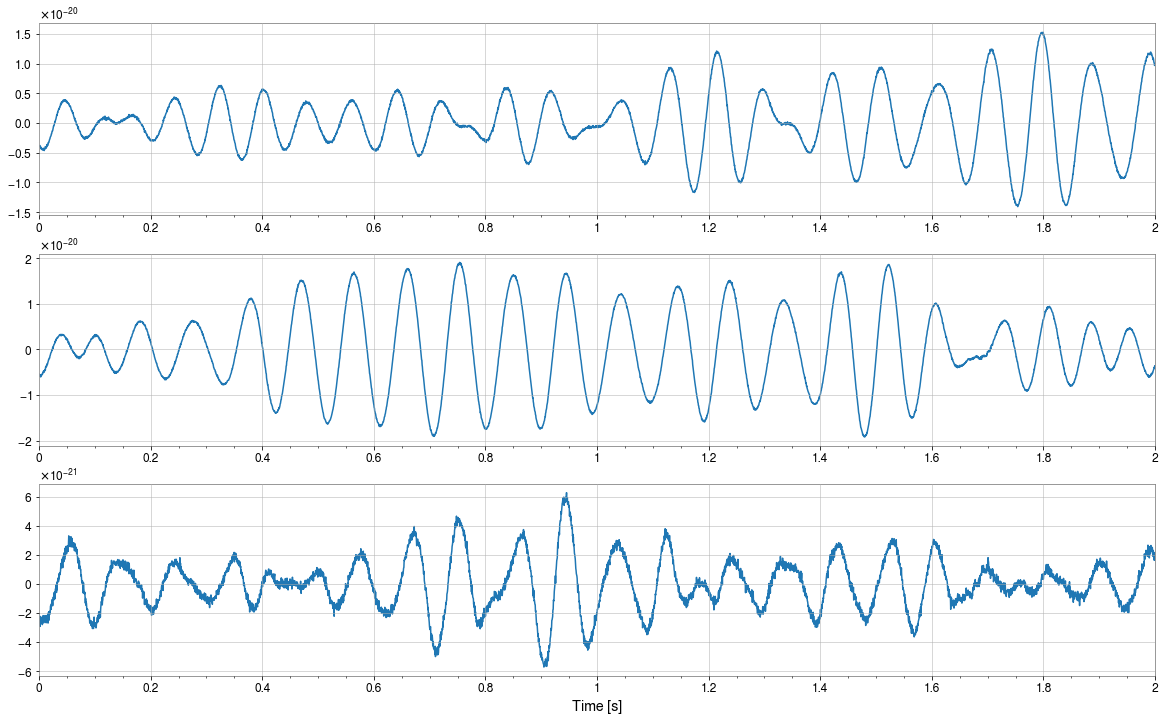

In [6]:
# The gwpy's TimeSeries function expects array-like input data array as its first argument
# and sample_rate : float, Quantity, optional the rate of samples per second (Hertz)
def get_tseries_from_file(file_name):
  t_data = np.load(file_name)
  tseries1 = TimeSeries(t_data[0,:], sample_rate=2048)
  tseries2 = TimeSeries(t_data[1,:], sample_rate=2048)
  tseries3 = TimeSeries(t_data[2,:], sample_rate=2048)
  return tseries1, tseries2, tseries3


def plot_tseries(t1, t2, t3):
  plot = Plot(t1, t2, t3, separate=True, sharex=True, figsize=[20, 12])
  ax = plot.gca()
  ax.set_xlim(0, 2)
  ax.set_xlabel('Time [s]')
  plt.show()
  
file_1 = '../input/g2net-gravitational-wave-detection/train/0/0/0/000a5b6e5c.npy'
  
tseries1, tseries2, tseries3 = get_tseries_from_file(file_1)
plot_tseries(tseries1, tseries2, tseries3)
  
  